Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_file = r"C:\Users\Lenovo\Downloads\titanic\train.csv"
test_file = r"C:\Users\Lenovo\Downloads\titanic\test.csv"
submission_file = r"C:\Users\Lenovo\Downloads\titanic\gender_submission.csv"

In [3]:
df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

In [4]:
# Display basic information about the dataset
print(df_train.info())
print(df_train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

In [5]:
# Check for missing values
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Fill missing values
# Fill Age with median value

df_train.loc[:, 'Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_test.loc[:, 'Age'] = df_test['Age'].fillna(df_test['Age'].median())

In [7]:
# Fill Embarked with mode value
df_train.loc[:, 'Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [8]:
# Fill Fare with median value in test set
df_test.loc[:, 'Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

In [9]:
# Drop Cabin column due to too many missing values
df_train.drop(columns=['Cabin'], inplace=True)
df_test.drop(columns=['Cabin'], inplace=True)

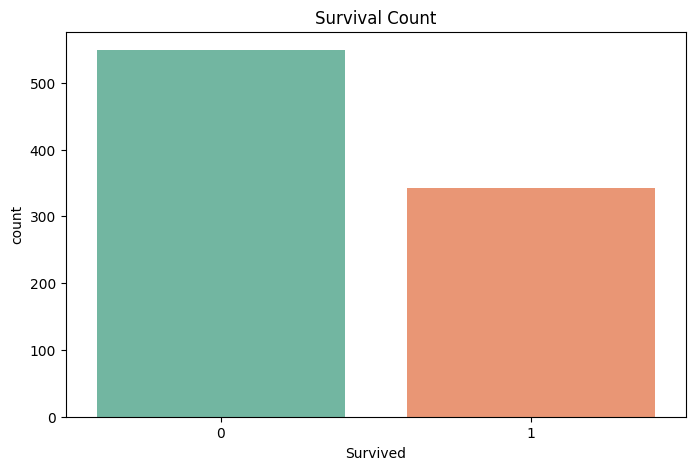

In [10]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=df_train, hue='Survived', palette='Set2', legend=False)
plt.title("Survival Count")
plt.show()

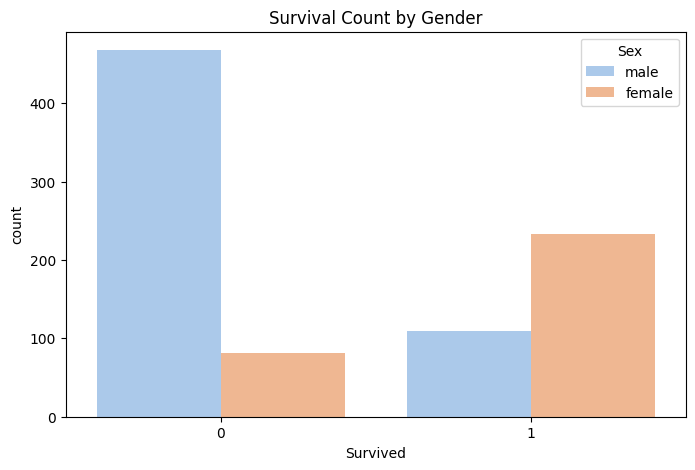

In [11]:
# Survival by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=df_train, palette='pastel')
plt.title("Survival Count by Gender")
plt.show()

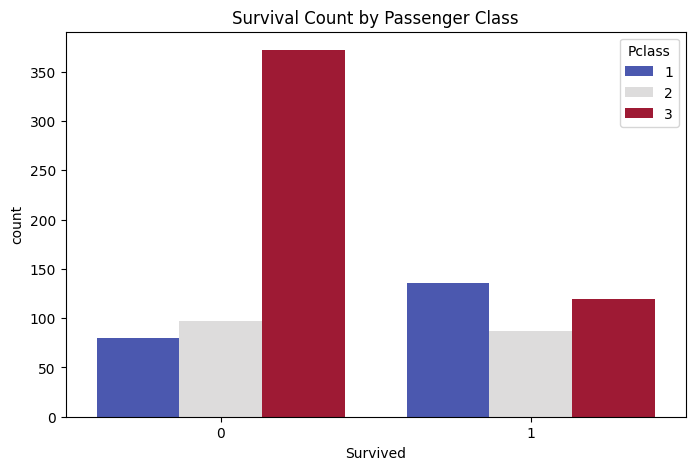

In [12]:
# Survival by class
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Pclass', data=df_train, palette='coolwarm')
plt.title("Survival Count by Passenger Class")
plt.show()

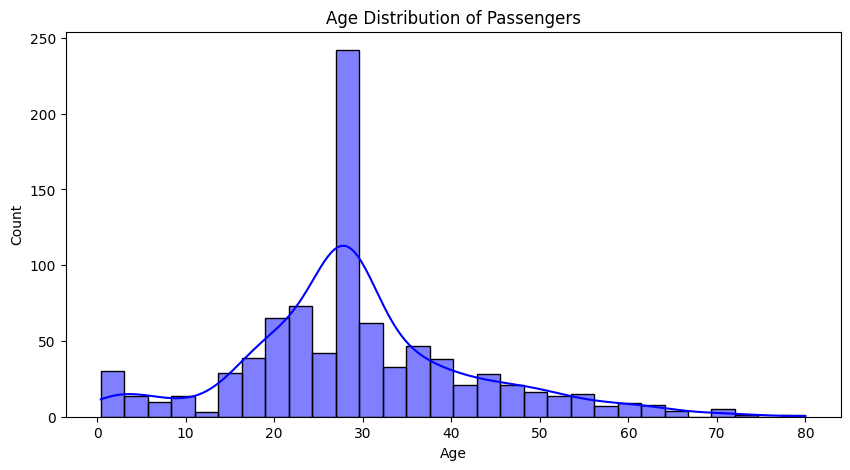

In [13]:
# Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_train['Age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution of Passengers")
plt.show()

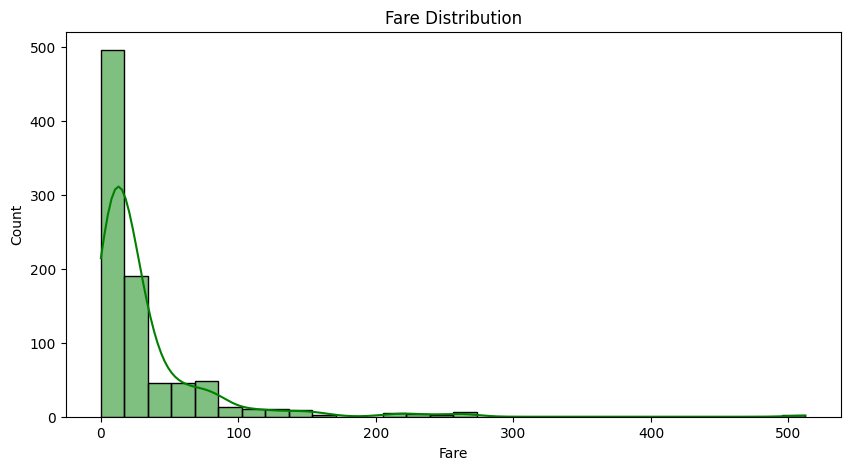

In [14]:
# Fare distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_train['Fare'], bins=30, kde=True, color='green')
plt.title("Fare Distribution")
plt.show()

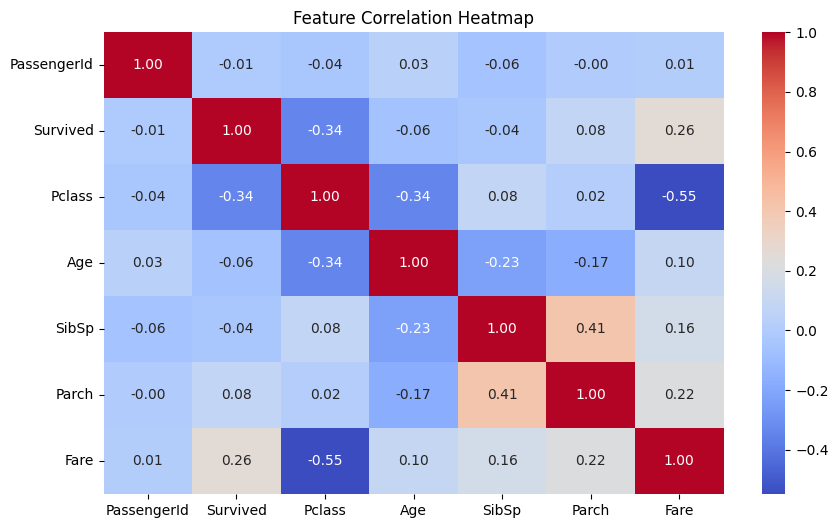

In [15]:
plt.figure(figsize=(10, 6))

# Select only numeric columns
numeric_df = df_train.select_dtypes(include=['number'])

# Compute correlation and plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Feature Correlation Heatmap")
plt.show()

OVERVIEW OF THE DATASET

The dataset includes passenger details from the Titanic disaster.

Our goal is to understand what factors influenced survival.

DAT CLEANING

Missing Values Handled:
Age: Filled with the median
.
Embarked: Filled with the most common value.
    
Fare: Filled with the median.

Cabin: Dropped due to too many missing values.


KEY OBSERVATIONS FROM THE ANALYSIS

Survival Rate: Only 38% of passengers survived.

Gender Impact:

74% of women survived, but only 18% of men did.

Class & Survival:

First-class passengers had the highest survival rate (63%).

Third-class passengers had the lowest (25%).

Age & Survival:

Children under 10 had a higher survival rate (~60%).

Elderly passengers had a lower survival rate.

Fare & Survival:

Higher ticket prices = better survival chances.

Likely due to better access to lifeboats.

CONCLUSION
1. Women, children, and first-class passengers had the best survival chances.
2. Males and third-class passengers had the lowest survival rates.
3. This data can be used to build a model to predict survival.